In [60]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install qiskit_aer
!pip install qiskit_ibm_runtime

   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.2 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.2 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.2 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.2 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.2 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.2 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.2 MB ? eta -:--:--
   ------ --------------------------------- 0.5/3.2 MB 178.6 kB/s eta 0:00:15
   ------ --------------------------------- 0.5/3.2 MB 178.6 kB/s eta 0:00:15
   ------ --------------------------------- 0.5/3.2 MB 178.6 kB/s eta 0:00:15
   ------ --------------------------------- 0.5/3.2 MB 178.6 kB/s eta 0:00:1

1. Create the circuit for superdense coding (using 2 qubits and 2 classical bits) and check its validity using Statevector for all the 4 possible cases.

In [61]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt

backend1 = AerSimulator()

def superdense_encode(bits):
    qc = QuantumCircuit(2)
    
    # Step 1: Create Bell pair
    qc.h(0)
    qc.cx(0, 1)

    # Step 2: Alice applies gates based on bits
    if bits == '01':
        qc.z(0)
    elif bits == '10':
        qc.x(0)
    elif bits == '11':
        qc.x(0)
        qc.z(0)

    # Step 3: Bob decodes
    qc.cx(0, 1)
    qc.h(0)
    
    return qc

# Run all 4 cases and print statevectors
for message in ['00', '01', '10', '11']:
    qc = superdense_encode(message)
    sv = Statevector.from_instruction(qc)
    print("Message: " + str(message))
    print(sv)


Message: 00
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Message: 01
Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Message: 10
Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))
Message: 11
Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


2. Run it on AerSimulator (no noise) and Real Quantum Hardware (1024 shots for both) for transmitting the classical bits 11 and find how many times do you send correct message by plotting histogram.

Counts: {'11': 1024}


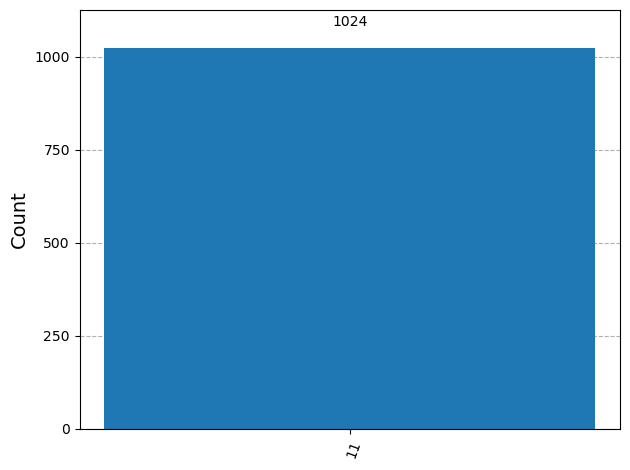

In [63]:
##AerSimulator (No Noise)

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import pickle

# Step 1: Build the superdense coding circuit for message '11'
qc = QuantumCircuit(2, 2)

# Create entanglement
qc.h(0)
qc.cx(0, 1)

# Alice encodes '11' using X and Z gates
qc.x(0)
qc.z(0)

# Bob decodes
qc.cx(0, 1)
qc.h(0)

# Measurement
qc.measure([0, 1], [0, 1])

# Step 2: Use AerSimulator (no noise)
sim = AerSimulator()

# Transpile the circuit for the simulator
compiled_with_aer = transpile(qc, sim)

# Run the circuit
job1 = sim.run(compiled_with_aer, shots=1024)
result = job1.result()
counts_aer_simulator = result.get_counts(compiled_with_aer)

# Display counts
print("Counts:", counts_aer_simulator)

# Step 3: Plot the results
plot_histogram(counts_aer_simulator)

Counts: {'11': 982, '10': 23, '01': 18, '00': 1}


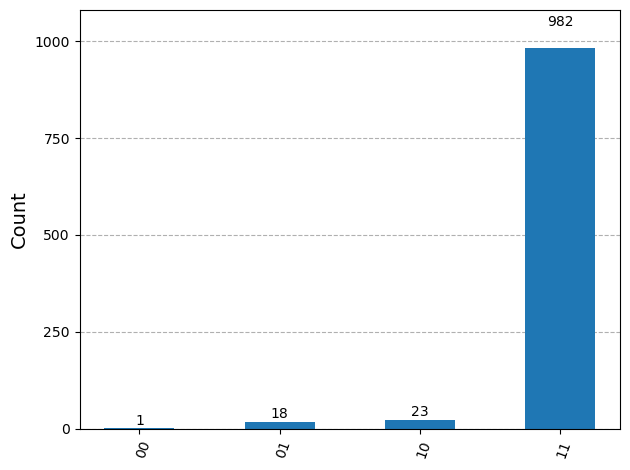

In [67]:
##Real Hardware (pickle)

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import pickle

# Step 1: Build the superdense coding circuit for message '11'
qc = QuantumCircuit(2, 2)

# Create entanglement
qc.h(0)
qc.cx(0, 1)

# Alice encodes '11' using X and Z gates
qc.x(0)
qc.z(0)

# Bob decodes
qc.cx(0, 1)
qc.h(0)

# Measurement
qc.measure([0, 1], [0, 1])

# Step 2: Use Real Hardware
with open("ibm_brisbane_noise_model.pkl","rb") as f:
    noise_model, basis_gates = pickle.load(f)

backend = AerSimulator(noise_model = noise_model, basis_gates = basis_gates)

# Transpile the circuit for the simulator
compiled_with_real_hardware = transpile(qc,backend)

# Run the circuit
job2 = backend.run(compiled_with_real_hardware, shots=1024)
result = job2.result()
counts_real_hardware = result.get_counts(compiled_with_real_hardware)

# Display counts
print("Counts:", counts_real_hardware)

# Step 3: Plot the results
plot_histogram(counts_real_hardware)

 (ii) Firstly you will use the nosie-free AerSimulator to check if you circuit is working fine.

In [69]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt

def word_to_binary(word):
    binary = ''.join(format(ord(c), '08b') for c in word)
    return binary 
# Remember for each letter in your word it will add 8 more bits so choose a relatively shorter word ~12 letters or less

def binary_to_word(binary_str):
    # Pad with zeros if length not multiple of 8
    padded = binary_str.ljust((len(binary_str) + 7) // 8 * 8, '0')
    return ''.join(chr(int(padded[i:i+8], 2)) for i in range(0, len(padded), 8))

string = 'abbas'
nombre = word_to_binary(string)
bit_pairs = [nombre[i:i+2] for i in range(0,len(nombre),2)]

sim = AerSimulator()
received_bits = ''

for pair in bit_pairs:
    # 1. Create a 2-qubit, 2-classical-bit circuit
    qc = QuantumCircuit(2, 2)

    # 2. Create Bell pair (Alice and Bob share entanglement)
    qc.h(0)
    qc.cx(0, 1)

    # 3. Encode message on Alice's qubit based on 2 classical bits
    if pair == '00':
        pass  # no gates
    elif pair == '01':
        qc.x(0)
    elif pair == '10':
        qc.z(0)
    elif pair == '11':
        qc.z(0)
        qc.x(0)

    # 4. Bob's decoding
    qc.cx(0, 1)
    qc.h(0)

    # 5. Measurement
    qc.measure([0, 1], [0, 1])

    # 6. Simulate with Aer
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=1).result()
    counts = result.get_counts()
    
    # Extract the only result and reverse it
    raw_bit = list(counts.keys())[0]
    received_bit = raw_bit[::-1]
    received_bits += received_bit

    print(f"Sent: {pair}, Received: {received_bit}")

# Trim and decode
received_bits = received_bits[:len(nombre)]
decoded_word = binary_to_word(received_bits)

print("\nOriginal Word:", string)
print("Decoded Word: ", decoded_word)

Sent: 01, Received: 01
Sent: 10, Received: 10
Sent: 00, Received: 00
Sent: 01, Received: 01
Sent: 01, Received: 01
Sent: 10, Received: 10
Sent: 00, Received: 00
Sent: 10, Received: 10
Sent: 01, Received: 01
Sent: 10, Received: 10
Sent: 00, Received: 00
Sent: 10, Received: 10
Sent: 01, Received: 01
Sent: 10, Received: 10
Sent: 00, Received: 00
Sent: 01, Received: 01
Sent: 01, Received: 01
Sent: 11, Received: 11
Sent: 00, Received: 00
Sent: 11, Received: 11

Original Word: abbas
Decoded Word:  abbas


(iii) Now you will run this circuit on a real hardware to send a message. Remember that real hardwares have errors so the word that you are trying to send might change into something entirely different upon its arrival at the reciever's end.

In [71]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt
from qiskit_aer.noise import NoiseModel
import pickle

def word_to_binary(word):
    binary = ''.join(format(ord(c), '08b') for c in word)
    return binary 
# Remember for each letter in your word it will add 8 more bits so choose a relatively shorter word ~12 letters or less

def binary_to_word(binary_str):
    # Pad with zeros if length not multiple of 8
    padded = binary_str.ljust((len(binary_str) + 7) // 8 * 8, '0')
    return ''.join(chr(int(padded[i:i+8], 2)) for i in range(0, len(padded), 8))

string = 'abbas'
nombre = word_to_binary(string)
bit_pairs = [nombre[i:i+2] for i in range(0,len(nombre),2)]

with open("ibm_brisbane_noise_model.pkl","rb") as f:
    noise_model, basis_gates = pickle.load(f)
backend = AerSimulator(noise_model = noise_model, basis_gates = basis_gates)

received_bits = ''

for pair in bit_pairs:
    # 1. Create a 2-qubit, 2-classical-bit circuit
    qc = QuantumCircuit(2, 2)

    # 2. Create Bell pair (Alice and Bob share entanglement)
    qc.h(0)
    qc.cx(0, 1)

    # 3. Encode message on Alice's qubit based on 2 classical bits
    if pair == '00':
        pass  # no gates
    elif pair == '01':
        qc.x(0)
    elif pair == '10':
        qc.z(0)
    elif pair == '11':
        qc.z(0)
        qc.x(0)

    # 4. Bob's decoding
    qc.cx(0, 1)
    qc.h(0)

    # 5. Measurement
    qc.measure([0, 1], [0, 1])

    # 6. Simulate with Aer
    compiled = transpile(qc, backend)
    result = backend.run(compiled, shots=1).result()
    counts = result.get_counts()
    
    # Extract the only result and reverse it
    raw_bit = list(counts.keys())[0]
    received_bit = raw_bit[::-1]
    received_bits += received_bit

    print(f"Sent: {pair}, Received: {received_bit}")

# Trim and decode
received_bits = received_bits[:len(nombre)]
decoded_word = binary_to_word(received_bits)

print("\nOriginal Word:", string)
print("Decoded Word: ", decoded_word)

Sent: 01, Received: 01
Sent: 10, Received: 10
Sent: 00, Received: 00
Sent: 01, Received: 01
Sent: 01, Received: 01
Sent: 10, Received: 10
Sent: 00, Received: 00
Sent: 10, Received: 10
Sent: 01, Received: 01
Sent: 10, Received: 10
Sent: 00, Received: 00
Sent: 10, Received: 01
Sent: 01, Received: 01
Sent: 10, Received: 00
Sent: 00, Received: 00
Sent: 01, Received: 01
Sent: 01, Received: 01
Sent: 11, Received: 11
Sent: 00, Received: 00
Sent: 11, Received: 01

Original Word: abbas
Decoded Word:  abaAq


(v) Since in this future qubit transmission is cheaper but not infinitely cheaper, so we have to make sure that correct message is transmitted most certainly as cheaply as possible. Can you find a way through which you can send correct message (almost always) through noisy AerSimulator in as little tries as possible?

In [73]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt
from qiskit_aer.noise import NoiseModel
import pickle

def word_to_binary(word):
    binary = ''.join(format(ord(c), '08b') for c in word)
    return binary 
# Remember for each letter in your word it will add 8 more bits so choose a relatively shorter word ~12 letters or less

def binary_to_word(binary_str):
    # Pad with zeros if length not multiple of 8
    padded = binary_str.ljust((len(binary_str) + 7) // 8 * 8, '0')
    return ''.join(chr(int(padded[i:i+8], 2)) for i in range(0, len(padded), 8))

string = 'abbas'
nombre = word_to_binary(string)
bit_pairs = [nombre[i:i+2] for i in range(0,len(nombre),2)]

with open("ibm_brisbane_noise_model.pkl","rb") as f:
    noise_model, basis_gates = pickle.load(f)

backend = AerSimulator(noise_model = noise_model, basis_gates = basis_gates)
received_bits = ''

for pair in bit_pairs:
    # 1. Create a 2-qubit, 2-classical-bit circuit
    qc = QuantumCircuit(2, 2)

    # 2. Create Bell pair (Alice and Bob share entanglement)
    qc.h(0)
    qc.cx(0, 1)

    # 3. Encode message on Alice's qubit based on 2 classical bits
    if pair == '00':
        pass  # no gates
    elif pair == '01':
        qc.x(0)
    elif pair == '10':
        qc.z(0)
    elif pair == '11':
        qc.z(0)
        qc.x(0)

    # 4. Bob's decoding
    qc.cx(0, 1)
    qc.h(0)

    # 5. Measurement
    qc.measure([0, 1], [0, 1])

    # 6. Simulate with Aer
    compiled = transpile(qc, backend)
    result = backend.run(compiled, shots=1).result()
    counts = result.get_counts()
    
    # Extract the result and reverse it
    raw_bit = list(counts.keys())[0] #We get the bit pair with the highest count (probability)
    received_bit = raw_bit[::-1] #reverse it because order is opposite (counter intuitive) than what is in theory
    received_bits += received_bit

    print(f"Sent: {pair}, Received: {received_bit}")

# Trim and decode
received_bits = received_bits[:len(nombre)]
decoded_word = binary_to_word(received_bits)

print("\nOriginal Word:", string)
print("Decoded Word: ", decoded_word)

Sent: 01, Received: 01
Sent: 10, Received: 10
Sent: 00, Received: 00
Sent: 01, Received: 01
Sent: 01, Received: 01
Sent: 10, Received: 10
Sent: 00, Received: 00
Sent: 10, Received: 10
Sent: 01, Received: 01
Sent: 10, Received: 10
Sent: 00, Received: 00
Sent: 10, Received: 10
Sent: 01, Received: 01
Sent: 10, Received: 10
Sent: 00, Received: 00
Sent: 01, Received: 01
Sent: 01, Received: 01
Sent: 11, Received: 11
Sent: 00, Received: 00
Sent: 11, Received: 11

Original Word: abbas
Decoded Word:  abbas
